# Lab 4
## More Data Scraping and EDA

In this lab, you will improve your skills in scraping data from web pages, organizing the data in a desired format, and performing EDA.

For this lab, we are reusing code from Harvard's CS109: https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

## Lab3.A. Run code for scraping Indeed.com data

You firs task will be to exectute the following blocks of code and try to understand what is happening after each line of the code. You will have to answer several questions to show your understanding.

Let us start with importing of the relevant packages.

In [4]:
import urllib2
import bs4 #this is beautiful soup

import time
from pandas import Series
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

As you see, you imported the package called `re`, which supports regular expression operations. You have already used the other packages. 

The following block will access and load the contents of an Indeed.com web page. It will probably give you a warning -- please ignore it.

In [5]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)


C:\Users\phongtheha\Anaconda3\envs\py27\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\phongtheha\Anaconda3\envs\py27\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


** Question 1**: 
 * What kind of page did you land on? Explain in a few sentences what is the content of this page. This is a job search website
 * What does the "?" and "&" in the url mean? "?" marks the beginning of a query while "&" seperates variables between the query string
 * Explore the content of the web page. If you are using Firefox, open the page Inspector to understand how the underlying html code relates to the displayed content.
 * What pieces of the html code are responsible for showing the job title, company name, and job location?
 Job title: <a target="_blank" id="sja3" data-tn-element="jobTitle" class="jobtitle turnstileLink" href="https://www.indeed.com/pagead/clk?mo=r&amp;ad=-6NYlbfkN0DUnwefsF7K5sI9KMOiuTab93Tl5aV87o5poBYEvjEbgE7oyuYH0UeAhALLy4-EmfX3NsumWTwincAUMvqzNnXan_m3jR2zWzgJ8NY6ulF1l4PWGa0iESEkhVfXNdFhGylM-TyDJrrQaeYGEyv5KsKwVkYgcq61bsToXHbULvBwmPRpc-aJ1moAdHF87E8-jic3Z0yQlPriZs9U-514BrZAVSHCJ8HjjXpzm_x8PjYHQbGcsrkTCiURt4EpTfnyoa_PI-WCBGCvoWnagIWCxdPbMj_QUSpyG_qWXTCQKoRWCX5BZRgcR6rHEv0SxH5k6RewZrug14-vp0vjlovaRNTZ6QnRaWvEF8IVegBGZNbg5Z4shKTwZLAoxWGfEYbybCbaCalZkt_dlGmuHiNQVrTp9vxoDffiNQL-VEKHwUHQfiYXvkUY1JsVLKrnMepFTpn41RukNjJdEXwAaavTdzRZpE0AmqPYpLzIro0mNjGjRPy9NuakJXqxdCwpMCsavPC9bxLofgTxl1ih-BSF3_UdLPc0mk0ecK_4YqC_MvVRNov0BbWYs0nyA4iEm_Lj29kXGEpYnJ-WlL4R6AFvXcNf4f5uE7eQhakP4_I1Nu_9lDyN9miJLwdQwQ_WYdPUyHGbPn60KJBoREMNlIWIQtsfVZUto-zLsfj1U9hs5zSXikY7QE_cIRgbtjdExpw1iwX1PZpiCvSXVMSVTn-70TR0Qw3LcU3Uxj8JFgsSNNH4ZD6eANSdOx_XwA7GSZ0yFbwLPAahBtjPj3AyEMsAhUv9TlCT_BoBx8ewzEc7EBMjk0uD0QLXs0bmop7goYciaXq7HBHXfA7agW6t-HXG_51fXEUYEriAsDMzIUdd_LEQ2-dx5yPpTIaM-jmJSld4PxIwEUE4PoAD7QRXHsrPIx9j&amp;vjs=3&amp;p=3&amp;sk=&amp;fvj=0&amp;tk=1c61gsnsu51hg9bi&amp;jsa=2767" title="DATA SCIENTIST - MULTIPLE LOCATIONS" rel="noopener nofollow" onmousedown="sjomd('sja3'); clk('sja3');" onclick="setRefineByCookie([]); sjoc('sja3',0); convCtr('SJ')"><b>DATA</b> <b>SCIENTIST</b> - MULTIPLE LOCATIONS</a>
 
 Company Name: <span class="company">
    Provish Consulting</span>
    
  Location: <span class="location">Cleveland, OH 44101</span>
 
The following block of code will figure out how many job ads are there for jobs that contain "data scientist' in the job title.

In [8]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
job_count_string = job_count_string.split()[-2]

print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print job_count
print 'I want a %s' %(bs_tree.find(id = 'searchCount').contents[0].split()[-1])[:-1] #just testing the %



Search yielded 24,597 hits.
24597
I want a job


In [9]:
[i.text for i in bs_tree.findAll(class_ = 'location')]

[u'St. Louis, MO',
 u'Salt Lake City, UT 84123',
 u'Research Triangle Park, NC',
 u'Bellevue, WA',
 u'Philadelphia, PA 19146 (Point Breeze area)',
 u'Palo Alto, CA',
 u'Minnetonka, MN',
 u'Philadelphia, PA 19123 (Poplar-Ludlow-Yorktowne area)',
 u'Conshohocken, PA',
 u'Hillsboro, OR 97124',
 u'Dallas, TX',
 u'Philadelphia, PA',
 u'New York, NY',
 u'Portland, OR 97204',
 u'Sunnyvale, CA']

** Question 2**:
* What does the "find(id = 'searchCount')" in the first line mean? the first line find the first html code that has id 'searchCount'. Actually, even if we use find_all, it would just return one result because each html code has only one unique id
* What does the second line do? The second line splits each word into a list of unicodes and then take only the second to last element.

**Question 3**: 
* Write a piece of code that finds the Salary Estimate object on the page


The following piece of code allows you to find the links to all the job ads on the page.

In [10]:
salary_estimate = bs_tree.find(id = "rb_Salary Estimate")
salary_estimate

<div class="rbSection rbOpen" id="rb_Salary Estimate">\n<div class="rbHeader">\n<span aria-level="3" class="ws_bold" role="heading">\n                    Salary Estimate</span>\n</div>\n<div class="rbsrbo" id="SALARY_rbo">\n<ul class="rbList">\n<li onmousedown="rbptk('rb', 'salest', '1');">\n<a href="/q-data-scientist-$55,000-jobs.html" rel="nofollow" title="$55,000 (19900)">$55,000</a> (19900)</li>\n<li onmousedown="rbptk('rb', 'salest', '2');">\n<a href="/q-data-scientist-$75,000-jobs.html" rel="nofollow" title="$75,000 (15883)">$75,000</a> (15883)</li>\n<li onmousedown="rbptk('rb', 'salest', '3');">\n<a href="/q-data-scientist-$95,000-jobs.html" rel="nofollow" title="$95,000 (11663)">$95,000</a> (11663)</li>\n<li onmousedown="rbptk('rb', 'salest', '4');">\n<a href="/q-data-scientist-$110,000-jobs.html" rel="nofollow" title="$110,000 (8168)">$110,000</a> (8168)</li>\n<li onmousedown="rbptk('rb', 'salest', '5');">\n<a href="/q-data-scientist-$130,000-jobs.html" rel="nofollow" title="$

In [11]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(1): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    #jp = [''.join(jp.get('class')) for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)


We found a lot of jobs:  13


**Question 4**:
* explain why is `url` (first line in the for loop) defined as it is. What page are you landing at when `i = 3`? Because we want to append the jk component later. All job links share the first base parnt, only different jk
* What does command `bs_tree.find(id = 'resultsCol')` do? It gets the part of the page that shows the jobs
* What does command `''.join(jp.get('class'))` do? Because jp.get('class') returns lists of 2 strings, this command turns it into just one list of attached strings 'rowresult'
* Explain the properties and content of `job_links`. job_links is a list of all links created by appending the base url with jk/

**Question 5**:
* Reuse the code above to find links to the first 200 listed data science jobs

The following piece of code accesses and grabs the content of all ads in the `job_links` and extracts all the human-readable text tokens. Then, it counts on how many pages are words `mapreduce`, `spark`, and `visualization` used. It might take a few seconds to execute.

In [20]:
base_url = 'http://www.indeed.com'
job_links200 = []
while(len(job_links200) < 200): #continue until the list has 200 jobs or more
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    #jp = [''.join(jp.get('class')) for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links200.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)
len(job_links200)


201

In [21]:
#check the elements of the list
job_links200[:3]

['http://www.indeed.com/rc/clk?jk=8e58b7c7c537fefe',
 'http://www.indeed.com/rc/clk?jk=4387cc56a99a4b26',
 'http://www.indeed.com/rc/clk?jk=fe62709fb9ad37c2']

In [22]:
skill_set = {'mapreduce':0, 'spark':0, 'visualization':0}
counter0 = 0
for link in job_links200:
    counter0 +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter0 % 5 == 0:
        print len(job_links200) - counter0
        print skill_set
            
print skill_set

196
{'visualization': 2, 'spark': 1, 'mapreduce': 0}
191
{'visualization': 4, 'spark': 2, 'mapreduce': 0}
186
{'visualization': 5, 'spark': 3, 'mapreduce': 0}
181
{'visualization': 7, 'spark': 4, 'mapreduce': 0}
176
{'visualization': 8, 'spark': 5, 'mapreduce': 0}
171
{'visualization': 10, 'spark': 5, 'mapreduce': 0}
166
{'visualization': 12, 'spark': 6, 'mapreduce': 0}
161
{'visualization': 13, 'spark': 7, 'mapreduce': 0}
156
{'visualization': 15, 'spark': 8, 'mapreduce': 0}
151
{'visualization': 16, 'spark': 10, 'mapreduce': 0}
146
{'visualization': 18, 'spark': 11, 'mapreduce': 0}
141
{'visualization': 20, 'spark': 12, 'mapreduce': 0}
136
{'visualization': 21, 'spark': 13, 'mapreduce': 0}
131
{'visualization': 23, 'spark': 14, 'mapreduce': 0}
126
{'visualization': 24, 'spark': 15, 'mapreduce': 0}
121
{'visualization': 25, 'spark': 15, 'mapreduce': 0}
116
{'visualization': 28, 'spark': 16, 'mapreduce': 0}
111
{'visualization': 28, 'spark': 18, 'mapreduce': 0}
106
{'visualization': 31

** Question 6**
* What does the `re.sub()` do in the above code? To answer this, you will have to go to the documentation of the regular expression package (find it on web). re.sub() replaced all special characters in the string with a space
* What is the meaning of `[^a-z.+3]`? It matches anything except alphabetical characters and 3 dots
* What is the content of `skill_set`? It contains the number of skill keywords found in the links

The following piece of code plots the counts of different skills in the processed ads.

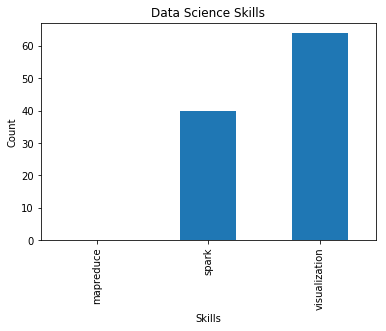

In [23]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

**Question 7**:
- rerun the code to find the counts of the 3 data science skills on the first 200 job ads 

**Already did above**

In [89]:
skill_set = {'python':0, 'r':0, 'machine learning':0}
counter1 = 0
for link in job_links200:
    counter1 +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter1 % 5 == 0:
        print len(job_links200) - counter1
        print skill_set
            
print skill_set

HTTPError:
206
{'python': 3, 'r': 4, 'machine learning': 3}
201
{'python': 8, 'r': 9, 'machine learning': 7}
HTTPError:
196
{'python': 10, 'r': 13, 'machine learning': 9}
191
{'python': 15, 'r': 18, 'machine learning': 13}
186
{'python': 19, 'r': 23, 'machine learning': 17}
HTTPError:
181
{'python': 22, 'r': 27, 'machine learning': 20}
176
{'python': 27, 'r': 32, 'machine learning': 24}
HTTPError:
171
{'python': 29, 'r': 36, 'machine learning': 26}
166
{'python': 34, 'r': 41, 'machine learning': 31}
161
{'python': 38, 'r': 46, 'machine learning': 34}
HTTPError:
156
{'python': 41, 'r': 50, 'machine learning': 37}
151
{'python': 46, 'r': 55, 'machine learning': 41}
HTTPError:
146
{'python': 48, 'r': 59, 'machine learning': 43}
141
{'python': 53, 'r': 64, 'machine learning': 47}
136
{'python': 57, 'r': 69, 'machine learning': 51}
HTTPError:
131
{'python': 60, 'r': 73, 'machine learning': 54}
126
{'python': 65, 'r': 78, 'machine learning': 58}
HTTPError:
121
{'python': 67, 'r': 82, 'machin

## Lab 3.B: Data analysis of job skills
In the first part of the lab, you created `skill_set` dictionary that counts occurences of 3 important data science skills. In this part of the lab we are asking you to create pandas `DataFrame` object as a table whose rows correspond to individual ads and columns correspond to important information about the ads and skills mentioned on those pages. Let us call the table `job_ads`. Process the first 1,000 data science ads, so your table should have 1,000 rows. For each ad, you will have to create the following columns:
- job title
- company name
- job location
- skill 1
- skill 2
- ...
- skill 20

Job title, company name, and job locations will be readable from the Indeed.com page. We are asking you to list 20 skills, instead of only 3 in the code above ('mapreduce', 'spark', 'visualization'). You will need to find another 17 words that are commonly used in data science job ads. To do it, please explore the content of at least 10 ads.

Once you creat your `job_ads` table, please preform EDA of the table, in a similar way you did in Lab 2: provide code and a 2-page document that summarizes interesitng insights about the first 1,000 data science jobs.

**Deliverables**:
- the modified Lab 4 .ipynb file that contains all the answers to the questions
- a 2-page documents presenting the results of your EDA of the `job_ads` data

In [29]:
base_url = 'http://www.indeed.com'
locationHTML = []
titleHTML=[]
companyHTML=[]
job_links1000 = []
i = 1
while (len(job_links1000)<1000): #continue until the list has 1000 jobs or more
    
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    i += 1
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    #add location, title and company associated with each job posting
    locationHTML +=  [jp.find_all(class_ = 'location') for jp in job_postings]
    titleHTML += [jp.find_all(class_ = 'jobtitle') for jp in job_postings]
    companyHTML += [jp.find_all(class_ = 'company') for jp in job_postings]
    
    
    # go after each link
    for id in job_ids:
        job_links1000.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)
len(job_links1000)


1001

In [30]:
print len(titleHTML)
#Check to see if the lists have the same length. If they don't match, then there must have been something wrong. Luckily, they do.
print len(job_links1000) == len(titleHTML) == len(locationHTML) == len(companyHTML) 

1001
True


In [31]:
#Now, we want to get only the text parts from each element of the list and convert them from unicode to string
import unicodedata
location = [] # new lists to be contained only 'clean' strings
title = []
company =[]
for j in range (len(job_links1000)):
    location += [unicodedata.normalize('NFKD', i.text).encode('ascii', 'ignore').strip('\n') for i in locationHTML[j]]
    title += [unicodedata.normalize('NFKD', i.text).encode('ascii','ignore').strip('\n') for i in titleHTML[j]]
    company += [unicodedata.normalize('NFKD', i.text).encode('ascii','ignore').strip('\n') for i in companyHTML[j]]
final_list = zip(title, company, location, job_links1000)
df = pd.DataFrame(final_list, columns = ['Title','Company', 'Location', 'link'])

print df.shape
df.head()


(1001, 4)


,Title,Company,Location,link
0,Data Scientist,Systematrix Solutions,"Atlanta, GA",http://www.indeed.com/rc/clk?jk=3dd9549adb115c66
1,Data Science Engineer,HomeAdvisor,"Indianapolis, IN",http://www.indeed.com/rc/clk?jk=6682f0e8865be732
2,NLP Scientist,"Tactical Edge, Inc.","Fairfield, CA",http://www.indeed.com/rc/clk?jk=04e851da10a222e2
3,Data Scientist,CompuGain,"Washington, DC 20515 (Capitol Hill area)",http://www.indeed.com/rc/clk?jk=6c92e9cafb2a359a
4,Data Scientist,Elsevier,"Philadelphia, PA 19103 (Belmont area)",http://www.indeed.com/rc/clk?jk=e52287bf8b1ad63e


In [32]:
skill_set = {'python':0, 'r':0, 'sql':0,'machine learning':0, 'java':0, 'scraping':0, 'C++':0, 'communication':0, 'spark':0, 'hadoop':0, 
             'mapreduce':0, 'visualization':0, 'wrangling':0, 'deep learning': 0, 'data mining': 0, 'regression':0, 'clustering':0,
            'matlab':0, 'stata':0, 'spss':0}
counter = 0
for skill in skill_set.keys():
    df[skill] = 0
for link in job_links1000:
    key_index = df[df.link == link].index.values[0]
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        df.set_value(index = key_index, col = 'link', value = 'HTTPError')
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
    
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            df.set_value(index = key_index, col = key, value = 1)
            
    if counter % 100 == 0:
        print len(job_links1000) - counter
        print skill_set
    counter += 1


1001
{'clustering': 0, 'visualization': 1, 'java': 1, 'python': 1, 'scraping': 0, 'data mining': 0, 'communication': 0, 'hadoop': 0, 'C++': 0, 'machine learning': 1, 'regression': 0, 'wrangling': 0, 'r': 1, 'matlab': 0, 'stata': 0, 'sql': 0, 'mapreduce': 0, 'spark': 1, 'spss': 0, 'deep learning': 0}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
901
{'clustering': 13, 'visualization': 31, 'java': 100, 'python': 65, 'scraping': 0, 'data mining': 26, 'communication': 55, 'hadoop': 27, 'C++': 0, 'machine learning': 73, 'regression': 21, 'wrangling': 0, 'r': 101, 'matlab': 15, 'stata': 3, 'sql': 43, 'mapreduce': 3, 'spark': 31, 'spss': 7, 'deep learning': 20}
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
HTTPError:
801
{'clustering': 26, 'visualization': 62

In [57]:
# for some reason, only 'java' is in the dictionary, but python created both 'Java' and 'java
#df.drop('Java', axis = 1, inplace = True)

df.shape
df[df.link == 'HTTPError']

,Title,Company,Location,link,clustering,visualization,java,python,scraping,data mining,...,regression,wrangling,r,matlab,stata,sql,mapreduce,spark,spss,deep learning
22,Data Scientist,Airbnb,"San Francisco, CA",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,Data Scientist: Financial Analytics Specialist,Bayer,"Pittsburgh, PA 15289",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,Associate Data Scientist - Machine Learning,Walmart,"Plano, TX 75086",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,Data Analyst/Data Scientist,Tripping.com,"San Francisco, CA 94105 (Financial District area)",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,Staff Data Scientist,eBay Inc.,"San Jose, CA",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,Data Engineer,Walmart eCommerce,"Sunnyvale, CA",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Structured Data Architect,eBay Inc.,"San Jose, CA",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Data Scientist,Robert Half Technology,"Spring, TX 77389",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Data Scientist - REMOTE,PTP,"Gold River, CA",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,Data Scientist,Finrise,"Burlingame, CA 94010",HTTPError,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#I want to drop all rows that have 'HTTPError'
dropped = df[df.link != 'HTTPError']
dropped = dropped.reset_index()
dropped.drop('index', axis = 1, inplace = True)
dropped

,Title,Company,Location,link,clustering,visualization,java,python,scraping,data mining,...,regression,wrangling,r,matlab,stata,sql,mapreduce,spark,spss,deep learning
0,Data Scientist,Systematrix Solutions,"Atlanta, GA",http://www.indeed.com/rc/clk?jk=3dd9549adb115c66,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,Data Science Engineer,HomeAdvisor,"Indianapolis, IN",http://www.indeed.com/rc/clk?jk=6682f0e8865be732,0,0,1,1,0,1,...,0,0,1,0,0,1,0,1,0,1
2,NLP Scientist,"Tactical Edge, Inc.","Fairfield, CA",http://www.indeed.com/rc/clk?jk=04e851da10a222e2,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,Data Scientist,CompuGain,"Washington, DC 20515 (Capitol Hill area)",http://www.indeed.com/rc/clk?jk=6c92e9cafb2a359a,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,Data Scientist,Elsevier,"Philadelphia, PA 19103 (Belmont area)",http://www.indeed.com/rc/clk?jk=e52287bf8b1ad63e,1,1,1,1,0,1,...,1,0,1,0,0,1,0,0,0,0
5,Data Scientist,Neiman Marcus,"Dallas, TX",http://www.indeed.com/rc/clk?jk=6eb385f2507fa151,0,1,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
6,Scientific Data Analyst,Core40,"Champaign, IL",http://www.indeed.com/rc/clk?jk=53386bd71a8c9419,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,Data Scientist,Flashii,"Palo Alto, CA",http://www.indeed.com/rc/clk?jk=ef4684eea3d40e2c,1,0,1,1,0,1,...,1,0,1,0,0,0,0,1,0,1
8,Data Scientist,Goldman Sachs,"New York, NY 10282 (Tribeca area)",http://www.indeed.com/rc/clk?jk=3da4feede99025f8,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Junior Data Scientist,Adaptable,"Boston, MA",http://www.indeed.com/rc/clk?jk=96807fbe1eb150b5,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [221]:
print skill_set

{'clustering': 92, 'visualization': 263, 'java': 826, 'python': 537, 'scraping': 6, 'data mining': 219, 'communication': 470, 'hadoop': 209, 'C++': 0, 'machine learning': 497, 'regression': 180, 'wrangling': 18, 'r': 874, 'matlab': 113, 'stata': 16, 'sql': 392, 'mapreduce': 40, 'spark': 264, 'spss': 63, 'deep learning': 117}


In [107]:
import pickle


Scrapping 1000 pages took an incredible amount of time, so I'm just gonna save the files

In [113]:
to_be_saved = [df, skill_set, final_list]
fileObject1 = open('scrapped_pages', 'wb')
pickle.dump(to_be_saved, fileObject)
print 'Done'
fileObject.close()

Done


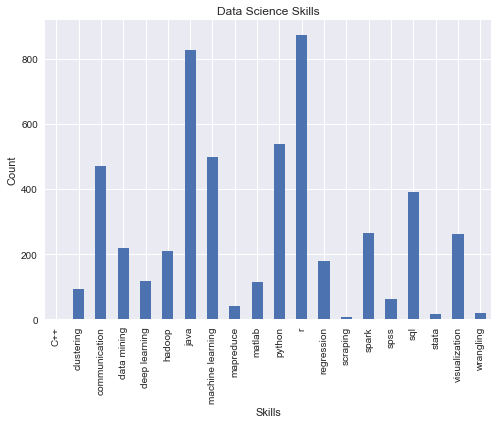

In [74]:
skseries = pd.Series(skill_set)
skseries.sort_values(ascending=False)

skseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

** EAST COAST VS WEST COAST**

Now, I want to compare and contrast the job requirements between states and regions (i.e. east coast vs west coast). 

To do this, I need to create a 'state' column from 'Location' and then sort the state column into regions

In [159]:
location = dropped.Location
location1 = location.str.split(', ')
for i in location1:
    if len(i) == 1:
        if i[0] == 'Remote' or i[0] == 'Home Based' or i[0] == 'United States' or i[0] == 'Work at Home':
            i.append('NA')
        elif i[0] == 'Pennsylvania':
            i.append('PA')
        elif i[0] == 'New Jersey':
            i.append('NJ')
        elif i[0] == 'New York State':
            i.append('NY')
        elif i[0] == 'Indiana':
            i.append('IN')
        elif i[0] == 'Missouri':
            i.append('MO')
        elif i[0] == 'Maryland':
            i.append('MD')
        else: 
            i.append(i[0])

dropped['State'] = pd.Series(state[1] for state in location1)
dropped.State.head()


0                              GA
1                              IN
2                              CA
3    DC 20515 (Capitol Hill area)
4         PA 19103 (Belmont area)
Name: State, dtype: object

In [172]:
b= []
dropped.State.apply(getstate)
def getstate(x):
     b.append(x.split(' ')[0])


Finally, we have a dataset with 'clean' state abbreviations

In [173]:
dropped['State'] = b
dropped

,Title,Company,Location,link,clustering,visualization,java,python,scraping,data mining,...,wrangling,r,matlab,stata,sql,mapreduce,spark,spss,deep learning,State
0,Data Scientist,Systematrix Solutions,"Atlanta, GA",http://www.indeed.com/rc/clk?jk=3dd9549adb115c66,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,GA
1,Data Science Engineer,HomeAdvisor,"Indianapolis, IN",http://www.indeed.com/rc/clk?jk=6682f0e8865be732,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,1,IN
2,NLP Scientist,"Tactical Edge, Inc.","Fairfield, CA",http://www.indeed.com/rc/clk?jk=04e851da10a222e2,1,1,1,1,0,1,...,0,1,0,0,0,0,0,1,1,CA
3,Data Scientist,CompuGain,"Washington, DC 20515 (Capitol Hill area)",http://www.indeed.com/rc/clk?jk=6c92e9cafb2a359a,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,DC
4,Data Scientist,Elsevier,"Philadelphia, PA 19103 (Belmont area)",http://www.indeed.com/rc/clk?jk=e52287bf8b1ad63e,1,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,PA
5,Data Scientist,Neiman Marcus,"Dallas, TX",http://www.indeed.com/rc/clk?jk=6eb385f2507fa151,0,1,1,1,0,1,...,0,1,1,0,1,0,1,0,0,TX
6,Scientific Data Analyst,Core40,"Champaign, IL",http://www.indeed.com/rc/clk?jk=53386bd71a8c9419,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,IL
7,Data Scientist,Flashii,"Palo Alto, CA",http://www.indeed.com/rc/clk?jk=ef4684eea3d40e2c,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,CA
8,Data Scientist,Goldman Sachs,"New York, NY 10282 (Tribeca area)",http://www.indeed.com/rc/clk?jk=3da4feede99025f8,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,NY
9,Junior Data Scientist,Adaptable,"Boston, MA",http://www.indeed.com/rc/clk?jk=96807fbe1eb150b5,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,MA


Now, let's create a column for region by mapping the states with the dictionary state_to_region.

Note that in this dictionary, N - North East W - West M - Mid West S - South O - Other

In [174]:
state_to_region = {'AK': 'O','AL': 'S','AR': 'S','AS': 'O','AZ': 'W','CA': 'W','CO': 'W','CT': 'N','DC': 'N','DE': 'N','FL': 'S','GA': 'S','GU': 'O','HI': 'O',
'IA': 'M','ID': 'W','IL': 'M','IN': 'M','KS': 'M','KY': 'S','LA': 'S','MA': 'N','MD': 'N','ME': 'N','MI': 'W','MN': 'M','MO': 'M','MP': 'O','MS': 'S','MT': 'W','NA': 'O','NC': 'S','ND': 'M','NE': 'W','NH': 'N','NJ': 'N','NM': 'W','NV': 'W','NY': 'N','OH': 'M','OK': 'S','OR': 'W','PA': 'N','PR': 'O','RI': 'N','SC': 'S','SD': 'M','TN': 'S','TX': 'S','UT': 'W','VA': 'S','VI': 'O','VT': 'N','WA': 'W','WI': 'M','WV': 'S','WY': 'W'
}


In [181]:
dropped['Region'] = dropped.State.map(state_to_region)
pd.crosstab(dropped.Region, dropped.python)

python,0,1
Region,,
M,38,66
N,122,165
O,10,9
S,65,94
W,129,185


In [233]:
import seaborn as sns

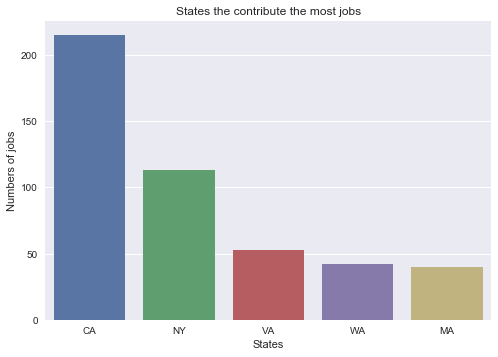

In [248]:
r = dropped.Region.value_counts()
sns.barplot(['CA', 'NY', 'VA', 'WA','MA'], [215,113,53,42,40])
plt.title('States the contribute the most jobs')
plt.xlabel('States')
plt.ylabel('Numbers of jobs')
plt.show()

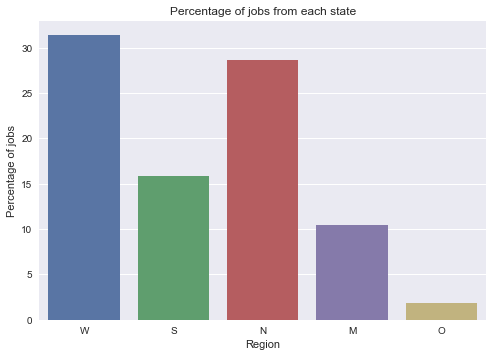

W    314
N    287
S    159
M    104
O     19
Name: Region, dtype: int64

In [255]:
s = dropped.Region.value_counts(ascending = False)[:5]
sns.barplot(['W', 'S', 'N', 'M', 'O'], [31.4,15.9,28.7,10.4, 1.9])
plt.xlabel('Region')
plt.ylabel('Percentage of jobs')
plt.title('Percentage of jobs from each state')
plt.show()
s

In [226]:
grouped = dropped.groupby('State')
a =  np.where(grouped.python.sum() >= grouped.r.sum(), 'Python', 'R')
compare = pd.DataFrame(a, dropped.State.unique(), columns = ['R or Python'])
compare.T

,GA,IN,CA,DC,PA,TX,IL,NY,MA,NC,...,MN,WI,TN,PR,NE,VT,KY,SD,OK,AR
R or Python,R,R,R,R,R,R,R,R,R,R,...,Python,R,R,R,R,R,R,Python,R,R


In [225]:
pd.crosstab(dropped.Region, dropped.java)

java,0,1
Region,,
M,11,93
N,27,260
O,1,18
S,8,151
W,36,278


In [215]:
skill_set
dropped[(dropped.python == 0) & (dropped.visualization == 1)]

,Title,Company,Location,link,clustering,visualization,java,python,scraping,data mining,...,r,matlab,stata,sql,mapreduce,spark,spss,deep learning,State,Region
6,Scientific Data Analyst,Core40,"Champaign, IL",http://www.indeed.com/rc/clk?jk=53386bd71a8c9419,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,IL,M
40,Analytic Data Scientist,IBM,"Denver, CO 80221",http://www.indeed.com/rc/clk?jk=1685c980ae29e029,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,CO,W
45,Data Scientist,AT&T,"Plano, TX",http://www.indeed.com/rc/clk?jk=ba57724295f3cf10,0,1,1,0,0,0,...,1,0,0,1,1,1,0,0,TX,S
46,Data Scientist,Telecommunications Development Corp.,"Washington, DC",http://www.indeed.com/rc/clk?jk=e7dde3c80eb0c5fe,0,1,1,0,0,1,...,1,0,1,1,0,0,0,0,DC,N
111,Data Scientist,elifsys,"Seattle, WA",http://www.indeed.com/rc/clk?jk=050de0bc4ff01543,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,WA,W
149,Senior Full Stack Scala Engineer,Fractal Industries,"Reston, VA",http://www.indeed.com/rc/clk?jk=8c641f3034fe1a83,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,VA,S
175,Data Scientist,Infometry,United States,http://www.indeed.com/rc/clk?jk=5af1babb98511024,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,NA,O
198,Analytic Insights-Analytic Solutions Senior Ma...,PwC,"Tampa, FL 33602",http://www.indeed.com/rc/clk?jk=0650370f9c3719c8,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,FL,S
215,Data Scientist - Infectious Disease,Chan Zuckerberg Biohub,"San Francisco, CA",http://www.indeed.com/rc/clk?jk=c50e596fbb599dac,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,CA,W
219,Data Scientist Intern for a fast-growing media...,Unsung Heroes,"New York, NY",http://www.indeed.com/rc/clk?jk=9d143e0e058c2044,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,NY,N
